## Ребров. Домашка 6

## Задание 1

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

def bias(y, z):
    return - 2 * (z - y)

In [30]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            z_train = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы, начиная со второго, обучаем на сдвиг
            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [82]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

#     print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
#     с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

#     print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
#     с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

    print(
          f'eta = {eta} |  ' 
          f'trees = {n_trees} '
          f'train error = {round(mean_squared_error(y_train, train_prediction))} '
          f'test error = {round(mean_squared_error(y_test, test_prediction))}'
          )

In [77]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(1, n_trees+1)), train_err, label='train error')
    plt.plot(list(range(1, n_trees+1)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

eta = 0.0005 |  trees = 1 train error = 29840 test error = 26687
eta = 0.0005 |  trees = 3 train error = 29733 test error = 26591
eta = 0.0005 |  trees = 5 train error = 29626 test error = 26494
eta = 0.0005 |  trees = 10 train error = 29360 test error = 26255
eta = 0.0005 |  trees = 20 train error = 28837 test error = 25783
eta = 0.0005 |  trees = 30 train error = 28325 test error = 25326
eta = 0.0005 |  trees = 40 train error = 27822 test error = 24880
eta = 0.0005 |  trees = 50 train error = 27329 test error = 24442
eta = 0.0005 |  trees = 75 train error = 26137 test error = 23379
eta = 0.0005 |  trees = 100 train error = 25003 test error = 22363
eta = 0.005 |  trees = 1 train error = 29598 test error = 26470
eta = 0.005 |  trees = 3 train error = 28549 test error = 25523
eta = 0.005 |  trees = 5 train error = 27540 test error = 24631
eta = 0.005 |  trees = 10 train error = 25184 test error = 22519
eta = 0.005 |  trees = 20 train error = 21118 test error = 18890
eta = 0.005 |  trees

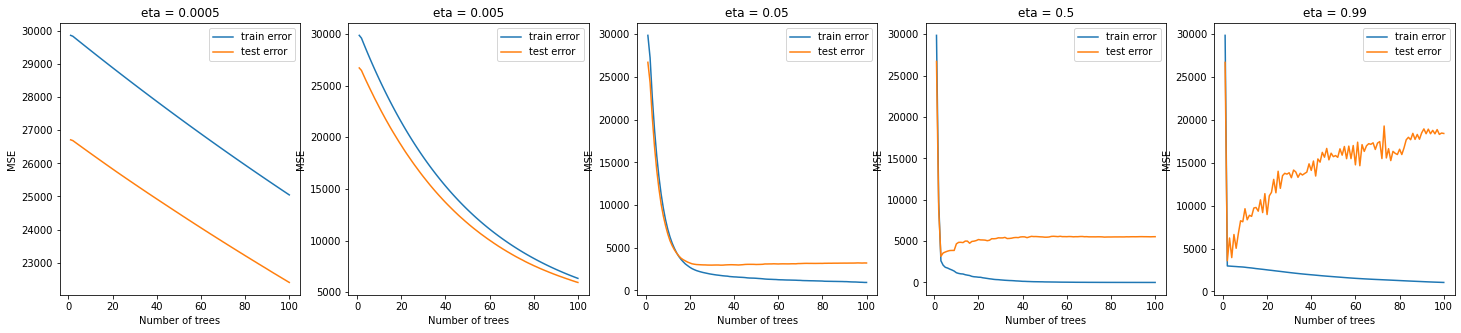

In [85]:
n_trees_list = [1, 3, 5, 10, 20, 30, 40, 50, 75, 100]
eta_list = [0.0005, 0.005, 0.05, 0.5, 0.99]
max_depth =3
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

for number, eta in enumerate(eta_list):
    for n_trees in n_trees_list:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
        evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
#         errors_zip = list(zip(train_errors, test_errors))
#         errors.append(errors_zip)
#     errors = np.array(errors).reshape(4, 2)
#     hwplot(n_trees_list, errors, eta)

    ax_ = ax[number]
    ax_.plot(list(range(1, n_trees+1)), train_errors, label='train error')
    ax_.plot(list(range(1, n_trees+1)), test_errors, label='test error')
    ax_.legend(loc='upper right')
    ax_.set_title(f'eta = {eta}')
    ax_.set_xlabel('Number of trees')
    ax_.set_ylabel('MSE')

Лучший результат получается в районе eta = 0.05 и trees = 30.
Дальше я буду брать поменьше деревьев, иначе это занимает много места и времени, а переобучение, похоже, неизбежно. От очень маленькой eta тоже мало толку.

Графики с разными eta


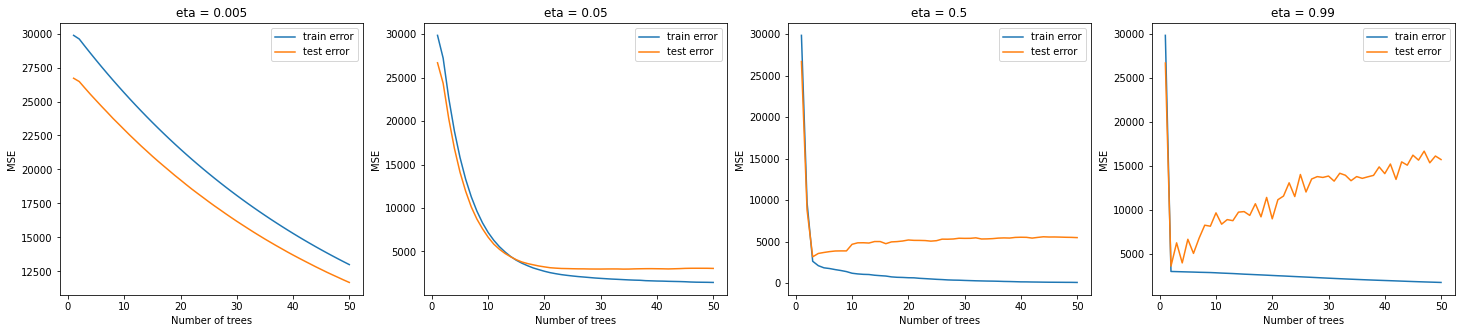

In [87]:
n_trees_list = [1, 5, 10, 25, 50]
eta_list = [0.005, 0.05, 0.5, 0.99]
max_depth =3
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))
print("Графики с разными eta")

for number, eta in enumerate(eta_list):
    for n_trees in n_trees_list:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
#         evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
#         errors_zip = list(zip(train_errors, test_errors))
#         errors.append(errors_zip)
#     errors = np.array(errors).reshape(4, 2)
#     hwplot(n_trees_list, errors, eta)

    ax_ = ax[number]
    ax_.plot(list(range(1, n_trees+1)), train_errors, label='train error')
    ax_.plot(list(range(1, n_trees+1)), test_errors, label='test error')
    ax_.legend(loc='upper right')
    ax_.set_title(f'eta = {eta}')
    ax_.set_xlabel('Number of trees')
    ax_.set_ylabel('MSE')

Графики с разной глубиной деревьев


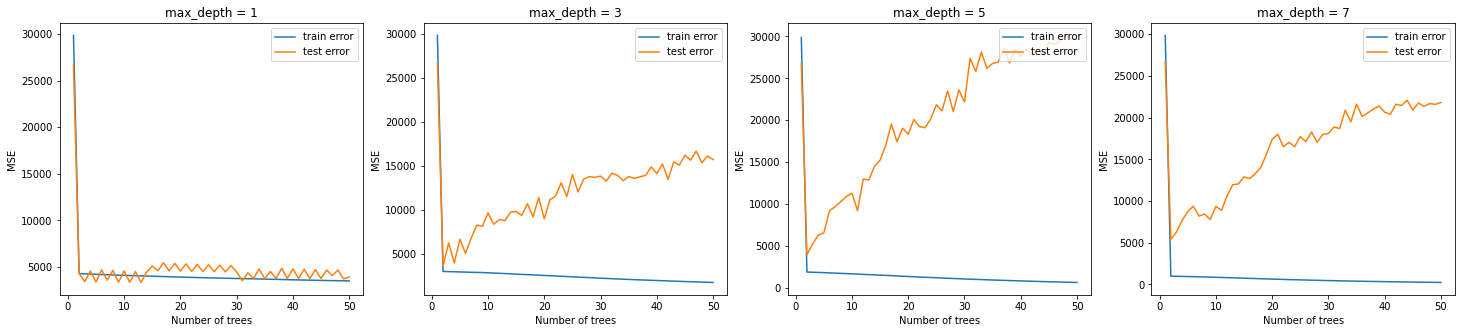

In [88]:
n_trees_list = [1, 5, 10, 25, 50]
eta_list = [0.005, 0.05, 0.5, 0.99]
max_depth_list =[1, 3, 5, 7]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))
print("Графики с разной глубиной деревьев")


for number, max_depth in enumerate(max_depth_list):
    for n_trees in n_trees_list:
        coefs = [1] * n_trees
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
#         evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
#         errors_zip = list(zip(train_errors, test_errors))
#         errors.append(errors_zip)
#     errors = np.array(errors).reshape(4, 2)
#     hwplot(n_trees_list, errors, eta)

    ax_ = ax[number]
    ax_.plot(list(range(1, n_trees+1)), train_errors, label='train error')
    ax_.plot(list(range(1, n_trees+1)), test_errors, label='test error')
    ax_.legend(loc='upper right')
    ax_.set_title(f'max_depth = {max_depth}')
    ax_.set_xlabel('Number of trees')
    ax_.set_ylabel('MSE')

Вывод: из-за глубины 7 я не уверен в выводе, но похоже, что большая глубина деревьев не идет на пользу точности алгоритма

## Задание 2

In [96]:
def sgb_fit(n_trees, max_depth, X_train_all, X_test, y_train_all, y_test, coefs, eta, sub):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        s = int(X_train_all.shape[0] * sub)
        conc = np.c_[X_train_all, y_train_all]
        data = np.random.permutation(conc)[:s]
        X_train = data[:, :-1]
        y_train = data[:, -1]

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            z_train = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы, начиная со второго, обучаем на сдвиг
            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [97]:
def get_train_error_plot(n_trees, train_errors, train_errors_s):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(1, n_trees+1)), train_errors, label='train error')
    plt.plot(list(range(1, n_trees+1)), train_errors_s, label='stochastic train error')
    plt.legend(loc='upper right')
    plt.show()

In [100]:
def get_test_error_plot(n_trees, test_errors, test_errors_s):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(1, n_trees+1)), test_errors, label='test error')
    plt.plot(list(range(1, n_trees+1)), test_errors_s, label='stochastic test error')
    plt.legend(loc='upper right')
    plt.show()

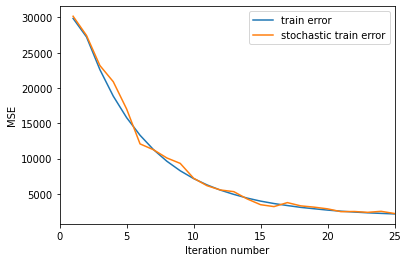

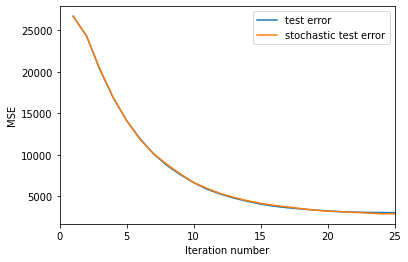

In [106]:
n_trees = 25
eta = 0.05
max_depth =3
# fig = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))
coefs = [1] * n_trees
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees_s, train_errors_s, test_errors_s = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, 0.5)

get_train_error_plot(n_trees, train_errors, train_errors_s)
get_test_error_plot(n_trees, test_errors, test_errors_s)